In [326]:
import tensorflow as tf
import os

In [327]:
gpus=tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [328]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [329]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(),

In [330]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import os

In [331]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 13 files belonging to 2 classes.


In [332]:
data = '/home/lenovo/Desktop/BMG/ai-model/detect-menu-bar-ai/data'

In [333]:
import tensorflow as tf

data = '/home/lenovo/Desktop/BMG/ai-model/detect-menu-bar-ai/data'
print(f"Path to data directory: {data}")

image_dataset = tf.keras.utils.image_dataset_from_directory(data)





Path to data directory: /home/lenovo/Desktop/BMG/ai-model/detect-menu-bar-ai/data
Found 13 files belonging to 2 classes.


In [334]:
image_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [335]:
data_iterator=image_dataset.as_numpy_iterator()

In [336]:
batch=data_iterator.next()

In [337]:
batch[0].shape

(13, 256, 256, 3)

In [338]:
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [339]:
len(batch)

2

In [340]:
data_iterator

In [341]:
image_exts= ['jpeg','png','bmp','jpg']

In [342]:
image_exts

['jpeg', 'png', 'bmp', 'jpg']

In [343]:
data_dir = '/home/lenovo/Desktop/BMG/ai-model/detect-menu-bar-ai/data'


if os.path.exists(data_dir) and os.path.isdir(data_dir):
 
    for image_class in os.listdir(data_dir):
        class_path = os.path.join(data_dir, image_class)
        
        if os.path.isdir(class_path):
            for image in os.listdir(class_path):
                image_path = os.path.join(class_path, image)
                try:
                    img=cv2.imread(image_path)
                    tip=imghdr.what(image_path)
                    if tip not in image_exts:
                        print('image not in ext list{}'.format(image_path))
                        os.remove(image_path)

                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")


In [344]:
batch[1].shape

(13,)

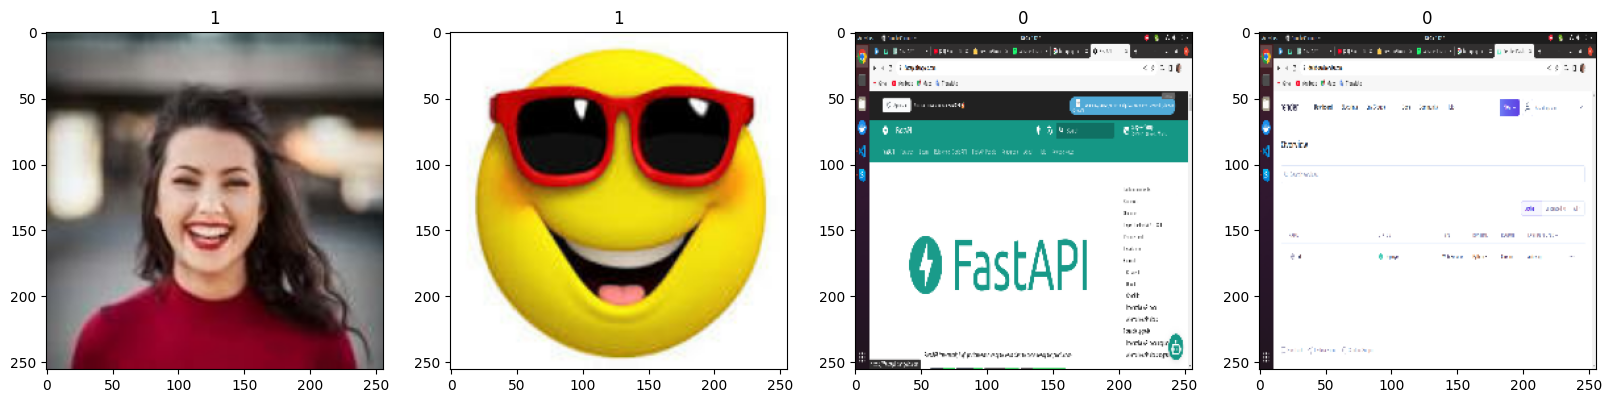

In [345]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [346]:
data = data.map(lambda x,y: (x/255, y))

AttributeError: 'str' object has no attribute 'map'

In [ ]:
data.as_numpy_iterator().next()

(array([[[[6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          ...,
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09]],
 
         [[6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          ...,
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09]],
 
         [[6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          ...,
          [6.8586283e-09, 6.8586283e-09, 6.8586283e-09],
          [6.8586283e-09, 6.8586283e-

#preprocessing and pipelining

split_data_set


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

build_model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
MaxPooling2D??

Init signature: MaxPooling2D(*args, **kwargs)
Source:        
class MaxPooling2D(Pooling2D):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output,
    when using the `"valid"` padding option, has a spatial shape
    (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    For example, for `strides=(1, 1)` and `padding="valid"`:

    >>> x = tf.constant([[1., 2., 3.],
    ...                  [4., 5., 6.],
    ...                  [7., 8., 9.]])
    >>> x = tf.reshape(x, [1, 3, 3, 1])


In [ ]:
import numpy as np
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Number of samples in the training dataset:", len(train_dataset))


NameError: name 'train_dataset' is not defined